In [12]:
import pandas as pd
import numpy as np 
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm
import os

pd.set_option('display.max_columns', 500)

# Data

In [5]:
styles = {}
DIR = '/kaggle/input/fashion-product-images-dataset/fashion-dataset'

files = os.listdir(f'{DIR}/styles/')

for i, filename in tqdm(enumerate(files), total=len(files), miniters=100):
    with open(f'{DIR}/styles/{filename}', 'rb') as f:
        row = json.load(f)
    styles[i] = row['data']

100%|██████████| 44446/44446 [05:37<00:00, 131.80it/s]


In [74]:
styles_df = pd.DataFrame.from_dict(styles).T

In [75]:
styles_df.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,visualTag,productDisplayName,variantName,myntraRating,catalogAddDate,brandName,ageGroup,gender,baseColour,colour1,colour2,fashionType,season,year,usage,vat,displayCategories,weight,navigationId,landingPageUrl,articleAttributes,crossLinks,brandUserProfile,codEnabled,styleImages,lookGoodAlbum,style360Images,masterCategory,subCategory,articleType,isEMIEnabled,otherFlags,articleDisplayAttr,productDescriptors,styleOptions,colours,discountData,productSpecificationEntry,relatedStyleOptions,associatedImageProducts,styleVideoAlbumList
0,1566,299,299,P,299,27144,,Artengo Men Black Cap,Black,10,1445524255,Artengo,Adults-Men,Men,Black,NA,NA,Fashion,Summer,2011,Sports,5.5,"Sports Wear,Accessories,Sale",0,0,Caps/Artengo/Artengo-Men-Black-Cap/1566/buy,{},"[{'key': 'More Caps by Artengo', 'value': 'cap...",{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},"{'id': 1, 'typeName': 'Accessories', 'active':...","{'id': 18, 'typeName': 'Headwear', 'active': T...","{'id': 54, 'typeName': 'Caps', 'active': True,...",False,"[{'dataType': 'BOOLEAN', 'name': 'isFragile', ...","{'id': 54, 'core': {'order': '0', 'display': '...",{'description': {'descriptorType': 'descriptio...,"[{'id': 4953, 'name': 'Size', 'value': 'JUNIOR...",NaN,NaN,NaN,NaN,NaN,NaN
1,39342,2199,2199,P,288,81SU292201,,Fila Men Zoom Black Shoes,ZOOM HI,0,1450346785,FILA,Adults-Men,Men,Black,Blue,White,Core,Summer,2012,Casual,14.5,Footwear,0,0,Casual-Shoes/FILA/Fila-Men-Zoom-Black-Shoes/39...,{'Type': 'Driving Shoes'},"[{'key': 'More Casual Shoes by FILA', 'value':...",{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},"{'id': 10, 'typeName': 'Footwear', 'active': T...","{'id': 33, 'typeName': 'Shoes', 'active': True...","{'id': 93, 'typeName': 'Casual Shoes', 'active...",True,"[{'dataType': 'BOOLEAN', 'name': 'isFragile', ...","{'id': 93, 'core': {'order': '0', 'display': '...",{'description': {'descriptorType': 'descriptio...,"[{'id': 157461, 'name': 'Size', 'value': 'UK4'...",{'colors': {'39341': {'dre_landing_page_url': ...,NaN,NaN,NaN,NaN,NaN
2,13182,2499,2499,P,288,1SB106XX010,,FILA Men Dls Maxim Black Sports Shoes,Dls Maxim,1,1456403163,FILA,Adults-Men,Men,Black,NA,NA,Fashion,Fall,2011,Sports,14.5,"Sports Shoes,Footwear",0,20,Sports-Shoes/FILA/FILA-Men-Dls-Maxim-Black-Spo...,{'Sport': 'Basketball'},"[{'key': 'More Sports Shoes by FILA', 'value':...",{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},"{'id': 10, 'typeName': 'Footwear', 'active': T...","{'id': 33, 'typeName': 'Shoes', 'active': True...","{'id': 95, 'typeName': 'Sports Shoes', 'active...",True,"[{'dataType': 'BOOLEAN', 'name': 'isFragile', ...","{'id': 95, 'core': {'order': '0', 'display': '...",{'description': {'descriptorType': 'descriptio...,"[{'id': 61037, 'name': 'Size', 'value': 'UK7',...",{'colors': {'13181': {'dre_landing_page_url': ...,NaN,NaN,NaN,NaN,NaN
3,21762,1695,1440,RTV,360,MB1212001,,Fossil Men Mead Black Belt,Mead,0,1449669445,Fossil,Adults-Men,Men,Black,,,Fashion,Fall,2011,Casual,14.5,Accessories,0,0,Belts/Fossil/Fossil-Men-Mead-Black-Belt/21762/buy,{},"[{'key': 'More Belts by Fossil', 'value': 'bel...",{'uidx': '49948113.c25f.4356.af4f.c937cf6d2523...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},"{'id': 1, 'typeName': 'Accessories', 'active':...","{'id': 13, 'typeName': 'Belts', 'active': True...","{'id': 49, 'typeName': 'Belts', 'active': True...",True,"[{'dataType': 'BOOLEAN', 'name': 'isFragile', ...","{'id': 49, 'core': {'order': '0', 'display': '...",{'description': {'descriptorType': 'descriptio...,"[{'id': 98334, 'name': 'Size', 'value': '36', ...",NaN,"{'discountType': 1, 'discountAmount': 255, 'di...",NaN,NaN,NaN,NaN
4,48692,1525,1509,P,416,EF8782,,Lucera Women Silver Earrings,Silver,1,1451098149,Lucera,Adults-Women,Women,Silver,NA,NA,Fashion,Summer,2012,Casual,5.5,NaN,0,0,Earri

In [76]:
styles_df['otherFlags'][0]

[{'dataType': 'BOOLEAN', 'name': 'isFragile', 'value': 'false'},
 {'dataType': 'BOOLEAN', 'name': 'isTryAndBuyEnabled', 'value': 'true'},
 {'dataType': 'BOOLEAN', 'name': 'isHazmat', 'value': 'false'},
 {'dataType': 'BOOLEAN', 'name': 'isJewellery', 'value': 'false'},
 {'dataType': 'BOOLEAN', 'name': 'isReturnable', 'value': 'true'},
 {'dataType': 'BOOLEAN', 'name': 'isExchangeable', 'value': 'true'},
 {'dataType': 'BOOLEAN', 'name': 'active', 'value': 'true'},
 {'dataType': 'BOOLEAN', 'name': 'socialSharingEnabled', 'value': 'true'},
 {'dataType': 'BOOLEAN', 'name': 'pickupEnabled', 'value': 'true'},
 {'dataType': 'BOOLEAN', 'name': 'isLarge', 'value': 'false'},
 {'dataType': 'BOOLEAN', 'name': 'codEnabled', 'value': 'true'}]

In [77]:
styles_df = styles_df.drop('otherFlags', axis=1)

In [78]:
styles_df['articleDisplayAttr'][0]

{'id': 54,
 'core': {'order': '0',
  'display': '2',
  'pdtDetail': '1',
  'pdtDeliveryOptions': '2',
  'pdtSimilar': '2',
  'pdtLike': '2'},
 'social': {'order': '1',
  'display': '2',
  'userLikes': '1',
  'styleNotes': '2',
  'crossSell': '1'},
 'explore': {'display': '2', 'crosslink': '1', 'similar': '1', 'order': '2'}}

In [79]:
styles_df = styles_df.drop('articleDisplayAttr', axis=1)

In [80]:
styles_df['crossLinks'][0]

[{'key': 'More Caps by Artengo', 'value': 'caps?f=brand:Artengo::gender:men'},
 {'key': 'More Black Caps', 'value': 'caps?f=colour:Black::gender:men'},
 {'key': 'More Caps', 'value': 'caps?f=gender:men'}]

In [81]:
styles_df = styles_df.drop('crossLinks', axis=1)

In [82]:
styles_df['subCategory'][0]

{'id': 18,
 'typeName': 'Headwear',
 'active': True,
 'socialSharingEnabled': True,
 'isReturnable': True,
 'isExchangeable': True,
 'pickupEnabled': True,
 'isTryAndBuyEnabled': True}

In [83]:
styles_df['subCategory'] = styles_df['subCategory'].apply(lambda x: x['typeName'])
styles_df['masterCategory'] = styles_df['masterCategory'].apply(lambda x: x['typeName'])
styles_df['articleType'] = styles_df['articleType'].apply(lambda x: x['typeName'])

In [84]:
styles_df[['masterCategory', 'subCategory']]

,masterCategory,subCategory
0,Accessories,Headwear
1,Footwear,Shoes
2,Footwear,Shoes
3,Accessories,Belts
4,Accessories,Jewellery
...,...,...
44441,Apparel,Topwear
44442,Apparel,Topwear
44443,Accessories,Watches
44444,Accessories,Bags


In [85]:
styles_df['productDescriptors'][0]


{'description': {'descriptorType': 'description', 'value': '-'}}

In [86]:
count = 0

for desc in styles_df['productDescriptors']:
    if 'description' not in desc:
        count += 1
        print(desc)
        
count

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


65

In [87]:
def map_desc(x):
    if x == {}:
        return {'description': {'descriptorType': 'description', 'value': '-'}}
    else:
        return x

In [88]:
styles_df['productDescriptors'] = styles_df['productDescriptors'].map(map_desc)

In [89]:
styles_df['productDescriptors'][3245]['description']['value']

'<p><strong>Composition</strong><br />Purple and white check shirt with black accents, made of 100% cotton, has a tipped collar, front buttoned placket, short sleeves, pockets on either chest with buttoned flaps and a curved hemline<br /><br /><strong>Fitting</strong><br />Regular<br /><br /><strong>Wash care</strong><br />Wash dark colours separately<br />Hand wash or machine wash cold using mild detergent<br />Do not wring or bleach<br />Flat dry in shade<br />Do not iron on print<br /><br />Checks that add immense style to your casual look is what indigo nation brings into your life. Be the cynosure of all eyes in this stylish shirt, while the fabric keeps you fresh and comfortable all day. Pair it with formal pants, denims or corduroys and black footwear for stylish formal and casual looks.<br /><br /><em>Model statistics</em><br />The model wears size 40 in shirts<br />Height: 6&rsquo;1&rdquo;; Chest: 38.5&rdquo;; Shoulders: 18.5&rdquo;</p>'

<p><strong>Composition</strong><br />Purple and white check shirt with black accents, made of 100% cotton, has a tipped collar, front buttoned placket, short sleeves, pockets on either chest with buttoned flaps and a curved hemline<br /><br /><strong>Fitting</strong><br />Regular<br /><br /><strong>Wash care</strong><br />Wash dark colours separately<br />Hand wash or machine wash cold using mild detergent<br />Do not wring or bleach<br />Flat dry in shade<br />Do not iron on print<br /><br />Checks that add immense style to your casual look is what indigo nation brings into your life. Be the cynosure of all eyes in this stylish shirt, while the fabric keeps you fresh and comfortable all day. Pair it with formal pants, denims or corduroys and black footwear for stylish formal and casual looks.<br /><br /><em>Model statistics</em><br />The model wears size 40 in shirts<br />Height: 6&rsquo;1&rdquo;; Chest: 38.5&rdquo;; Shoulders: 18.5&rdquo;</p>

In [90]:
styles_df['productDescriptors'] = styles_df['productDescriptors'].apply(lambda x: x['description']['value'])

In [95]:
styles_df.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,visualTag,productDisplayName,variantName,myntraRating,catalogAddDate,brandName,ageGroup,gender,baseColour,colour1,colour2,fashionType,season,year,usage,vat,displayCategories,weight,navigationId,landingPageUrl,articleAttributes,brandUserProfile,codEnabled,styleImages,lookGoodAlbum,style360Images,masterCategory,subCategory,articleType,isEMIEnabled,productDescriptors,styleOptions,colours,discountData,productSpecificationEntry,relatedStyleOptions,associatedImageProducts,styleVideoAlbumList
0,1566,299,299,P,299,27144,,Artengo Men Black Cap,Black,10,1445524255,Artengo,Adults-Men,Men,Black,NA,NA,Fashion,Summer,2011,Sports,5.5,"Sports Wear,Accessories,Sale",0,0,Caps/Artengo/Artengo-Men-Black-Cap/1566/buy,{},{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Headwear,Caps,False,-,"[{'id': 4953, 'name': 'Size', 'value': 'JUNIOR...",NaN,NaN,NaN,NaN,NaN,NaN
1,39342,2199,2199,P,288,81SU292201,,Fila Men Zoom Black Shoes,ZOOM HI,0,1450346785,FILA,Adults-Men,Men,Black,Blue,White,Core,Summer,2012,Casual,14.5,Footwear,0,0,Casual-Shoes/FILA/Fila-Men-Zoom-Black-Shoes/39...,{'Type': 'Driving Shoes'},{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Footwear,Shoes,Casual Shoes,True,<p><strong>Style Note</strong><br />A perfect ...,"[{'id': 157461, 'name': 'Size', 'value': 'UK4'...",{'colors': {'39341': {'dre_landing_page_url': ...,NaN,NaN,NaN,NaN,NaN
2,13182,2499,2499,P,288,1SB106XX010,,FILA Men Dls Maxim Black Sports Shoes,Dls Maxim,1,1456403163,FILA,Adults-Men,Men,Black,NA,NA,Fashion,Fall,2011,Sports,14.5,"Sports Shoes,Footwear",0,20,Sports-Shoes/FILA/FILA-Men-Dls-Maxim-Black-Spo...,{'Sport': 'Basketball'},{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Footwear,Shoes,Sports Shoes,True,"<p style=""text-align: justify;"">Win those winn...","[{'id': 61037, 'name': 'Size', 'value': 'UK7',...",{'colors': {'13181': {'dre_landing_page_url': ...,NaN,NaN,NaN,NaN,NaN
3,21762,1695,1440,RTV,360,MB1212001,,Fossil Men Mead Black Belt,Mead,0,1449669445,Fossil,Adults-Men,Men,Black,,,Fashion,Fall,2011,Casual,14.5,Accessories,0,0,Belts/Fossil/Fossil-Men-Mead-Black-Belt/21762/buy,{},{'uidx': '49948113.c25f.4356.af4f.c937cf6d2523...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Belts,Belts,True,"<p>Crafted from pure leather, this fossil belt...","[{'id': 98334, 'name': 'Size', 'value': '36', ...",NaN,"{'discountType': 1, 'discountAmount': 255, 'di...",NaN,NaN,NaN,NaN
4,48692,1525,1509,P,416,EF8782,,Lucera Women Silver Earrings,Silver,1,1451098149,Lucera,Adults-Women,Women,Silver,NA,NA,Fashion,Summer,2012,Casual,5.5,NaN,0,0,Earrings/Lucera/Lucera-Women-Silver-Earrings/4...,"{'Occasion': 'Western', 'Fine Jewellery': 'Fin...",{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Jewellery,Earrings,False,<p>Silver coloured earrings<br />An amber colo...,"[{'id': 189222, 'name': 'Size', 'value': 'Ones...",NaN,"{'discountType': 1, 'discountAmount': 16, 'dis...",NaN,NaN,NaN,NaN


In [99]:
styles_df['styleOptions'][7924]

[{'id': 150004,
  'name': 'Size',
  'value': '39',
  'unifiedSize': '39',
  'unifiedSizeValue': '39',
  'allSize': '39,39',
  'skuId': 157232,
  'skuAvailabilityDetailMap': {'1': {'sellerid': 29,
    'storeid': 2297,
    'sellername': 'Proleague',
    'availableCount': 0,
    'availableInWarehouses': '',
    'leadTime': 2,
    'supplyType': 'JUST_IN_TIME',
    'sellableInventoryCount': 0}},
  'warehouseIdToItemCountMap': {},
  'inventoryCount': 0,
  'available': False,
  'active': True},
 {'id': 150003,
  'name': 'Size',
  'value': '40',
  'unifiedSize': '40',
  'unifiedSizeValue': '40',
  'allSize': '40,40',
  'skuId': 157233,
  'skuAvailabilityDetailMap': {'1': {'sellerid': 29,
    'storeid': 2297,
    'sellername': 'Proleague',
    'availableCount': 0,
    'availableInWarehouses': '',
    'leadTime': 2,
    'supplyType': 'JUST_IN_TIME',
    'sellableInventoryCount': 0}},
  'warehouseIdToItemCountMap': {},
  'inventoryCount': 0,
  'available': False,
  'active': True}]

In [110]:
styles_df['brandUserProfile'][5567]

{'uidx': '631d97de.92b5.42c7.b1da.0fb9d7afeddfFXtCO8wRai',
 'bio': 'Cruelty Free Fashion Bags & Accessories Brand',
 'name': 'Baggit',
 'image': 'http://assets.myntassets.com/assets/images/2015/12/15/11450187100295-9626-1he76t4.jpg',
 'publicProfileId': 'baggit',
 'imageJsonEntryMap': {'0': '{"id":2547454,"createdBy":"631d97de.92b5.42c7.b1da.0fb9d7afeddfFXtCO8wRai","createdOn":1450187100000,"lastModifiedOn":1450187100000,"version":0,"format":"jpg","isCompressed":false,"resolution":"510X510","aspectRatio":"1:1","viewtype":"front","client_id":4,"client_description":"video_migration_script","client_reference_id":"2547454","imgs":{"S3":{"id":4460613,"relativePath":"assets/images/2015/12/15/11450187100295-9626-1he76t4.jpg","size":39407,"domain":"http://myntra.myntassets.com/","securedDomain":"https://myntrawebimages.s3.amazonaws.com/","resolutionFormula":"assets/images/2015/12/15/11450187100295-9626-1he76t4_($width)_($height).jpg","path":"http://myntra.myntassets.com/assets/images/2015/12/1

In [111]:
styles_df['brandName'] = styles_df['brandUserProfile'].apply(lambda x: x.get('name', 'UNK'))

In [113]:
styles_df.brandName.value_counts()

UNK                          17706
NIKE                          2203
PUMA                          2098
adidas                        1931
United Colors of Benetton     1563
                             ...  
New Balance                      7
Umbro                            4
Ferrari                          2
The Roadster Life                1
Avon                             1
Name: brandName, Length: 111, dtype: int64

In [114]:
styles_df['styleImages'][457]

{'default': {'imageURL': 'http://assets.myntassets.com/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images.jpg',
  'resolutions': {'1080X1440Xmini': 'http://assets.myntassets.com/h_1440,q_95,w_1080/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images_mini.jpg',
   '48X64': 'http://assets.myntassets.com/h_64,q_95,w_48/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images.jpg',
   '1080X1440': 'http://assets.myntassets.com/h_1440,q_95,w_1080/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images.jpg',
   '150X200': 'http://assets.myntassets.com/h_200,q_95,w_150/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images.jpg',
   '360X480': 'http://assets.myntassets.com/h_480,q_95,w_360/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images.jpg',
   '180X240': 'http://assets.myntassets.com/h_240,q_95,w_180/v1/images/style/properties/d99e159fee52cf3447db013a393dbf84_images.jpg',
   '360X480Xmini': 'http://assets.mynta

In [123]:
styles_df[~styles_df.colours.isna()].iloc[4578]['colours']

{'colors': {'5072': {'dre_landing_page_url': 'Watches/Being-Human/Being-Human-Women-Black-Silicon-Strap-with-Stones-Watch/5072/buy',
   'styleid': 5072,
   'global_attr_colour1': 'NA',
   'global_attr_base_colour': 'Black',
   'search_image': 'http://assets.myntassets.com/v1/images/style/properties/7bf01601fe946c76f87ab7a0fa8d4b90_images.jpg'},
  '5074': {'dre_landing_page_url': 'Watches/Being-Human/Being-Human-Women-Pink-Silicon-Strap-with-Stones-Watch/5074/buy',
   'styleid': 5074,
   'global_attr_colour1': 'NA',
   'global_attr_base_colour': 'Pink',
   'search_image': 'http://assets.myntassets.com/v1/images/style/properties/2326c00a40bb5890e97e65d8daa0ef33_images.jpg'},
  '5076': {'dre_landing_page_url': 'Watches/Being-Human/Being-Human-Women-Red-Silicon-Strap-with-Stones-Watch/5076/buy',
   'styleid': 5076,
   'global_attr_colour1': 'NA',
   'global_attr_base_colour': 'Red',
   'search_image': 'http://assets.myntassets.com/v1/images/style/properties/fff0b1f6e14d832cb5b65a5dbd688aaa

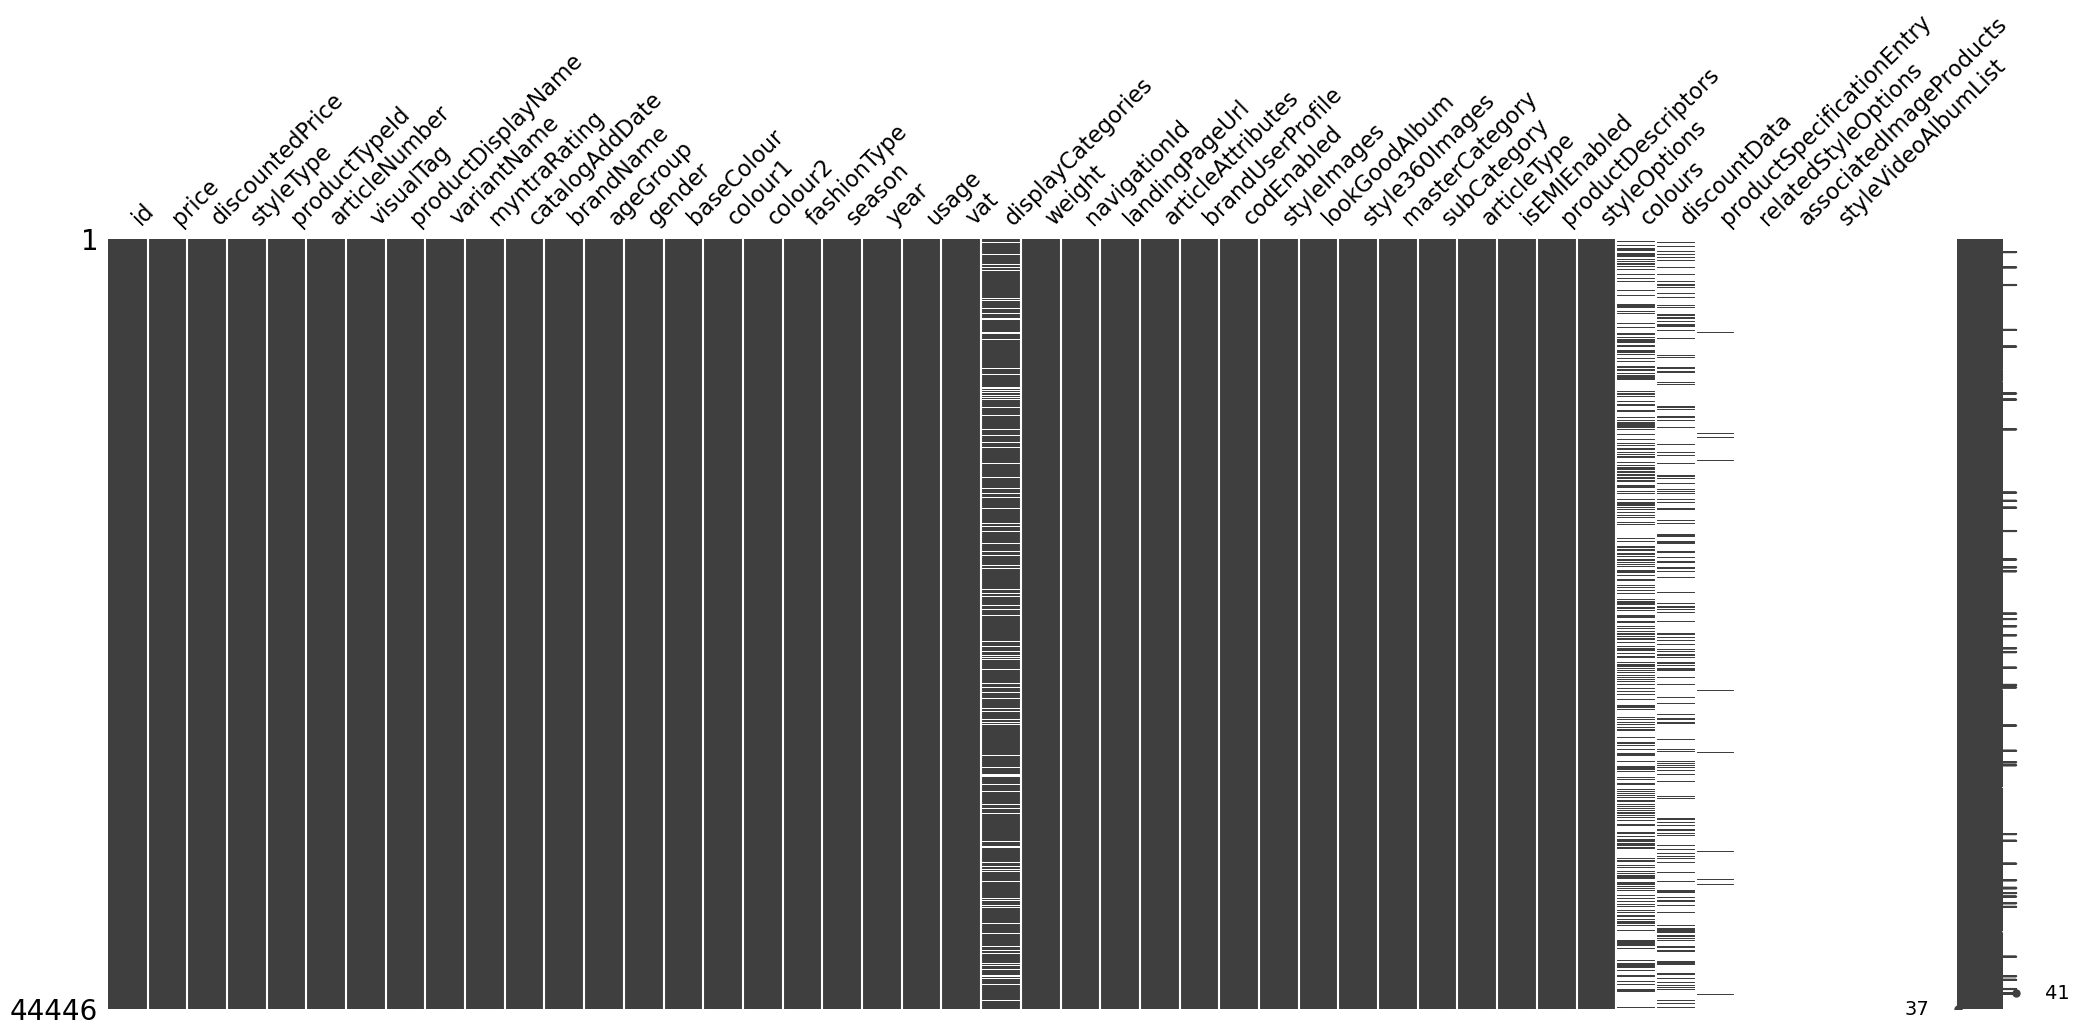

In [125]:
import missingno as msno

msno.matrix(styles_df)
plt.show()

In [133]:
styles_df[~styles_df.displayCategories.isna()].iloc[436]

id                                                                       14840
price                                                                     1699
discountedPrice                                                            594
styleType                                                                    P
productTypeId                                                              365
articleNumber                                                 11A6WB2U6142I945
visualTag                                                                     
productDisplayName           United Colors of Benetton Men Solid Brown Wallets
variantName                                                              Solid
myntraRating                                                                 1
catalogAddDate                                                      1446705981
brandName                                            United Colors of Benetton
ageGroup                                            

In [134]:
cols2drop = styles_df.columns[-4:]

In [135]:
cols2drop

Index(['productSpecificationEntry', 'relatedStyleOptions',
       'associatedImageProducts', 'styleVideoAlbumList'],
      dtype='object')

In [136]:
styles_df = styles_df.drop(cols2drop, axis=1)

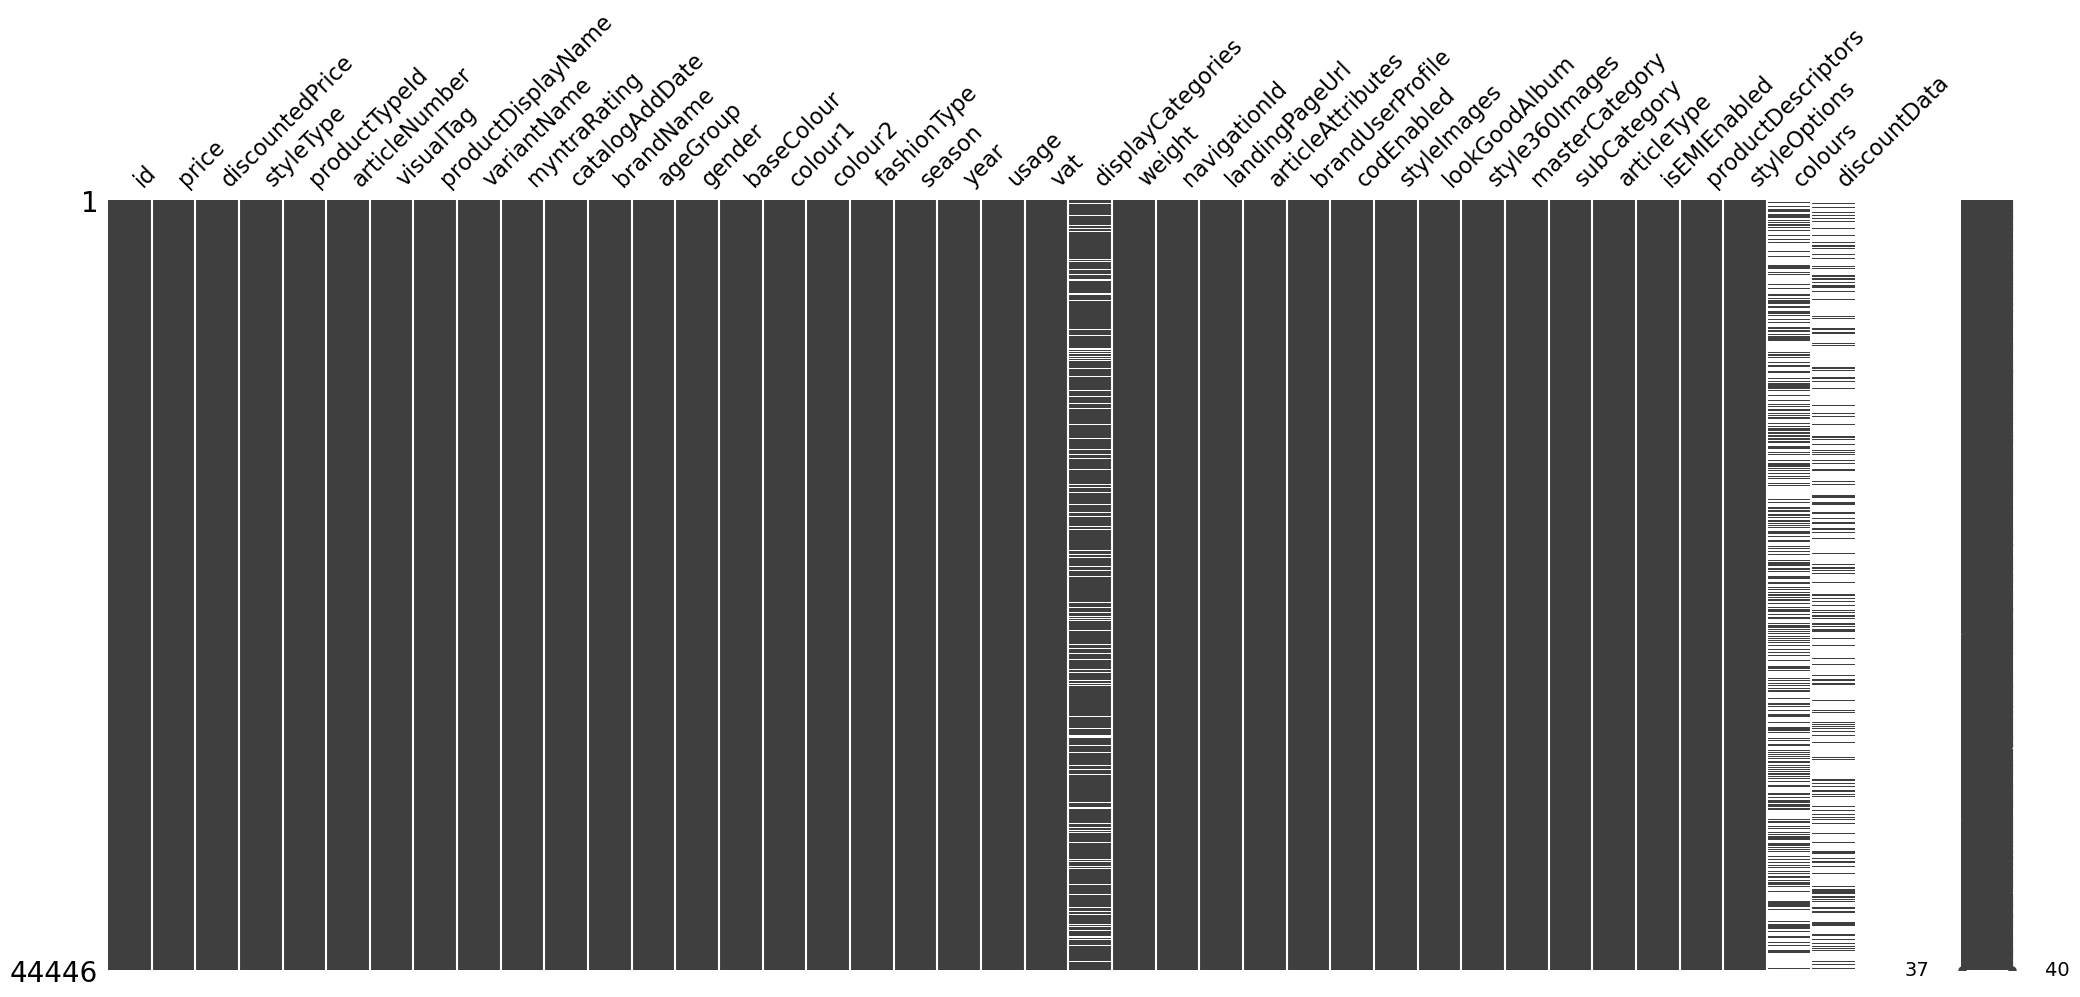

In [137]:
msno.matrix(styles_df)
plt.show()

In [139]:
hex(hash('0807-1st-df'))[2:10]

'668955cf'

In [140]:
styles_df.to_csv('/kaggle/working/styles-668955cf.csv')

In [141]:
styles_df.styleType.nunique()

19

In [142]:
styles_df.styleType = styles_df.styleType.astype('category')

In [143]:
styles_df.productTypeId.nunique()

171

In [144]:
styles_df.productTypeId = styles_df.productTypeId.astype('category')

In [145]:
styles_df.visualTag.nunique()

11

In [146]:
styles_df.visualTag = styles_df.visualTag.astype('category')

In [147]:
styles_df.brandName = styles_df.brandName.astype('category')

In [148]:
styles_df.ageGroup = styles_df.ageGroup.astype('category')

In [149]:
styles_df.gender = styles_df.gender.astype('category')

In [150]:
styles_df.baseColour = styles_df.baseColour.astype('category')
styles_df.colour1 = styles_df.colour1.astype('category')
styles_df.colour2 = styles_df.colour2.astype('category')
styles_df.fashionType = styles_df.fashionType.astype('category')
styles_df.season = styles_df.season.astype('category')

In [152]:
styles_df.articleType = styles_df.articleType.astype('category')

In [153]:
styles_df.masterCategory = styles_df.masterCategory.astype('category')
styles_df.subCategory = styles_df.subCategory.astype('category')

In [154]:
import pickle

with open('/kaggle/working/styles-668955cf.pkl', 'wb') as f:
    pickle.dump(styles_df, f)

In [156]:
with open('/kaggle/working/styles-668955cf.pkl', 'rb') as f:
    df = pickle.load(f)
    
df.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,visualTag,productDisplayName,variantName,myntraRating,catalogAddDate,brandName,ageGroup,gender,baseColour,colour1,colour2,fashionType,season,year,usage,vat,displayCategories,weight,navigationId,landingPageUrl,articleAttributes,brandUserProfile,codEnabled,styleImages,lookGoodAlbum,style360Images,masterCategory,subCategory,articleType,isEMIEnabled,productDescriptors,styleOptions,colours,discountData
0,1566,299,299,P,299,27144,,Artengo Men Black Cap,Black,10,1445524255,UNK,Adults-Men,Men,Black,NA,NA,Fashion,Summer,2011,Sports,5.5,"Sports Wear,Accessories,Sale",0,0,Caps/Artengo/Artengo-Men-Black-Cap/1566/buy,{},{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Headwear,Caps,False,-,"[{'id': 4953, 'name': 'Size', 'value': 'JUNIOR...",NaN,NaN
1,39342,2199,2199,P,288,81SU292201,,Fila Men Zoom Black Shoes,ZOOM HI,0,1450346785,FILA,Adults-Men,Men,Black,Blue,White,Core,Summer,2012,Casual,14.5,Footwear,0,0,Casual-Shoes/FILA/Fila-Men-Zoom-Black-Shoes/39...,{'Type': 'Driving Shoes'},{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Footwear,Shoes,Casual Shoes,True,<p><strong>Style Note</strong><br />A perfect ...,"[{'id': 157461, 'name': 'Size', 'value': 'UK4'...",{'colors': {'39341': {'dre_landing_page_url': ...,NaN
2,13182,2499,2499,P,288,1SB106XX010,,FILA Men Dls Maxim Black Sports Shoes,Dls Maxim,1,1456403163,FILA,Adults-Men,Men,Black,NA,NA,Fashion,Fall,2011,Sports,14.5,"Sports Shoes,Footwear",0,20,Sports-Shoes/FILA/FILA-Men-Dls-Maxim-Black-Spo...,{'Sport': 'Basketball'},{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Footwear,Shoes,Sports Shoes,True,"<p style=""text-align: justify;"">Win those winn...","[{'id': 61037, 'name': 'Size', 'value': 'UK7',...",{'colors': {'13181': {'dre_landing_page_url': ...,NaN
3,21762,1695,1440,RTV,360,MB1212001,,Fossil Men Mead Black Belt,Mead,0,1449669445,Fossil,Adults-Men,Men,Black,,,Fashion,Fall,2011,Casual,14.5,Accessories,0,0,Belts/Fossil/Fossil-Men-Mead-Black-Belt/21762/buy,{},{'uidx': '49948113.c25f.4356.af4f.c937cf6d2523...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Belts,Belts,True,"<p>Crafted from pure leather, this fossil belt...","[{'id': 98334, 'name': 'Size', 'value': '36', ...",NaN,"{'discountType': 1, 'discountAmount': 255, 'di..."
4,48692,1525,1509,P,416,EF8782,,Lucera Women Silver Earrings,Silver,1,1451098149,UNK,Adults-Women,Women,Silver,NA,NA,Fashion,Summer,2012,Casual,5.5,NaN,0,0,Earrings/Lucera/Lucera-Women-Silver-Earrings/4...,"{'Occasion': 'Western', 'Fine Jewellery': 'Fin...",{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Jewellery,Earrings,False,<p>Silver coloured earrings<br />An amber colo...,"[{'id': 189222, 'name': 'Size', 'value': 'Ones...",NaN,"{'discountType': 1, 'discountAmount': 16, 'dis..."


In [157]:
df.shape, styles_df.shape

((44446, 40), (44446, 40))